In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
# To display plots directly in the notebook:
%matplotlib inline

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import matplotlib
import sklearn
from pathlib import Path
import seaborn as sns

In [4]:
# To make the notebook reproducible
seed = 42
np.random.seed(seed)

In [5]:
# Set the directory in which to store data
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True) # Create the data directory

In [6]:
import urllib.request

url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
urllib.request.urlretrieve(url, DATA/'diabetes.csv')

(PosixPath('/Users/christoffertoftevag/2025/2025-høst/DAT158/machine learning/modul2/data/diabetes.csv'),
 <http.client.HTTPMessage at 0x1685af890>)

In [7]:
diabetes = pd.read_csv(DATA/'diabetes.csv')

In [8]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data = diabetes[['glucose', 'bmi', 'diabetes']]

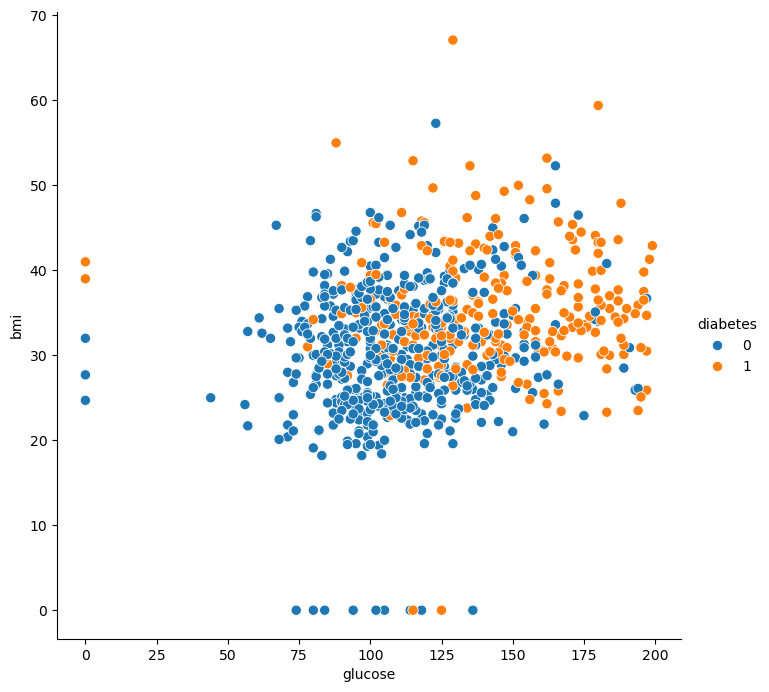

In [10]:
sns.pairplot(x_vars = 'glucose', y_vars = 'bmi', data=data, hue='diabetes', 
             height=7, 
             plot_kws={"s": 55} # Size of markers
            )
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
#?DecisionTreeClassifier

In [33]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=seed) # We'll discuss `max_depth=2` soon

In [34]:
X=data[['glucose', 'bmi']] # The features
y=data['diabetes'] # The labels

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed)

In [37]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [38]:
import sys
!{sys.executable} -m pip install graphviz
from graphviz import Source

In [39]:
from IPython.display import display
from IPython.display import SVG

In [40]:
from sklearn.tree import export_graphviz

In [41]:
graph = Source(export_graphviz(tree_clf, out_file=None, feature_names=X.columns, 
                               class_names=['not diabetes','diabetes'], filled = True, rounded=True))

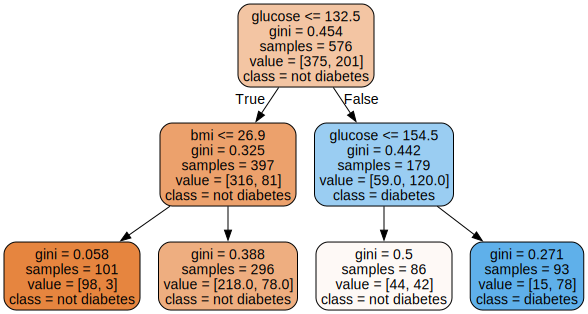

In [42]:
# The following requires graphviz on your computer
display(SVG(graph.pipe(format='svg')))

In [51]:
#skal nå prøve på dette:

- Train a decision tree classifier on the breast cancer wisconsin dataset (`sklearn.datasets.load_breast_cancer`), with `max-depth` set to 3 or 4.
- Make a training, validation and test set to figure out which one seems better, `max_depth` 3 or 4?
- Test your choice on the test set. You should get an accuracy of about 95%
- Plot the decision tree.
- Plot the decision boundaries for different pairs of features.
- Use `tree_clf.feature_importances_` to find which features were most important for the classification when using all the features.

In [54]:
from sklearn.datasets import load_breast_cancer

In [55]:
cancer_dataset = load_breast_cancer()

In [72]:
cancer_df = pd.DataFrame(cancer_dataset['data'], columns=cancer_dataset['feature_names'])
cancer_df['label'] = cancer_dataset['target']

In [75]:
#cancer_df.head(100)

In [78]:
X = cancer_df.drop('label', axis=1)
y = cancer_df['label']

In [82]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
from sklearn.model_selection import train_test_split
cancer_df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [86]:
#deler settet inn i trening og test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed)

# Deretter: del treningssettet i trening og validering
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=seed)

In [117]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=seed)

In [118]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [119]:
from IPython.display import display
from IPython.display import SVG

In [120]:
from sklearn.tree import export_graphviz

In [121]:
graph = Source(export_graphviz(tree_clf, out_file=None, feature_names=X.columns, 
                               class_names=['not diabetes','diabetes'], filled = True, rounded=True))

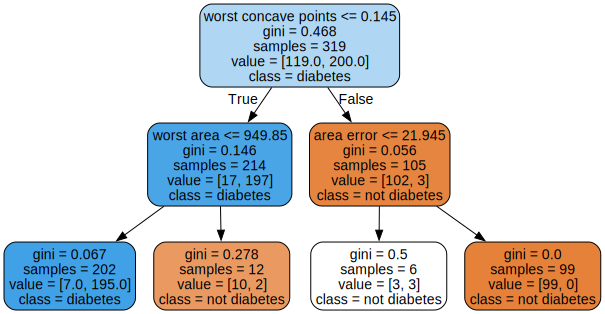

In [122]:
# The following requires graphviz on your computer
display(SVG(graph.pipe(format='svg')))

In [123]:
from sklearn.metrics import accuracy_score

# Forutsigelser
y_train_pred = tree_clf.predict(X_train)
y_val_pred = tree_clf.predict(X_val)
y_test_pred = tree_clf.predict(X_test)

# Nøyaktighet
print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation accuracy:", accuracy_score(y_val, y_val_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9623824451410659
Validation accuracy: 0.9345794392523364
Test accuracy: 0.9440559440559441


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [133]:
# Lag en DataFrame som viser feature importance og kolonnenavn
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_clf.feature_importances_
})

# Sorter etter viktighet (fra høyest til lavest)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vis resultatet pent
print(feature_importance_df)

                    Feature  Importance
27     worst concave points    0.866432
23               worst area    0.111704
13               area error    0.021865
0               mean radius    0.000000
16          concavity error    0.000000
28           worst symmetry    0.000000
26          worst concavity    0.000000
25        worst compactness    0.000000
24         worst smoothness    0.000000
22          worst perimeter    0.000000
21            worst texture    0.000000
20             worst radius    0.000000
19  fractal dimension error    0.000000
18           symmetry error    0.000000
17     concave points error    0.000000
15        compactness error    0.000000
1              mean texture    0.000000
14         smoothness error    0.000000
12          perimeter error    0.000000
11            texture error    0.000000
10             radius error    0.000000
9    mean fractal dimension    0.000000
8             mean symmetry    0.000000
7       mean concave points    0.000000


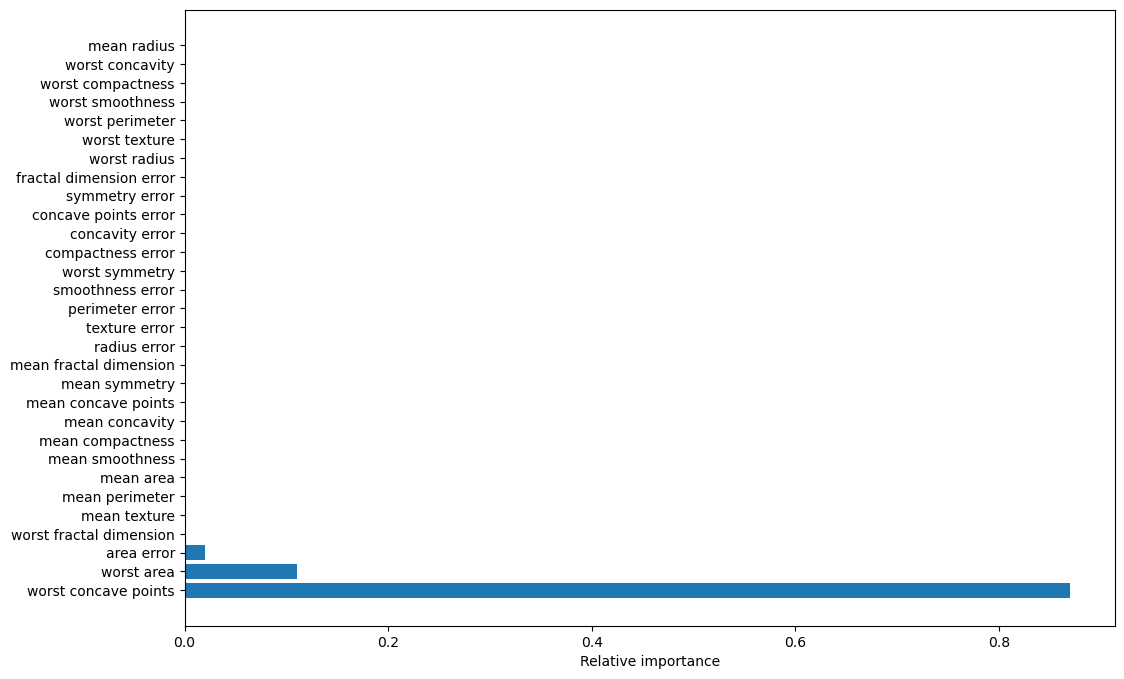

In [134]:
f, ax = plt.subplots(figsize=(12,8))
plt.barh(X_train.columns[indices], np.round(importances[indices],2))
plt.xlabel("Relative importance")
plt.show()

In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_val_pred = tree_clf.predict(X_val)

mean_squared_error(y_val, y_val_pred)

0.06542056074766354

In [140]:
mean_absolute_error(y_val, y_val_pred)

0.06542056074766354